In [ ]:
#two different approaches to make statistical inference 
#for fast decision-making, calculating daily entropy of each of them - the measure of uncertainty.
#the less uncertainty the more our confidence about spread of measured vale.
#inference about Average Order Value - AOV,
#given CR = 5% (Population proportion)
#Confident Level = 95%
#Confident Interval (as C) = 5%

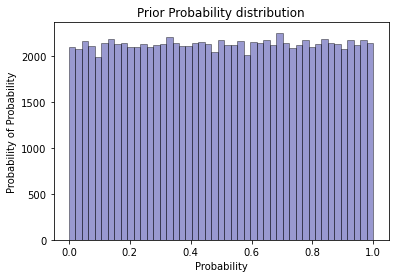

In [6]:
from scipy.stats import uniform
from scipy.stats import binom
from scipy.stats import entropy
from math import pi
import random
import collections
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline

def minimum_sample_size(CR=0.05, CL=95, C=0.05):
    #z-score
    if CL == 50:
        z = 0.674

    elif CL == 80:
        z = 1.282

    elif CL == 90:
        z = 1.645

    elif CL == 95:
        z = 1.96

    elif CL == 98:
        z = 2.326

    elif CL == 99:
        z = 2.576

    else:
        #CL = 95%
        z = 1.96

    p = CR
    sample_size = (z**2*p*(1-p))/C**2
    sample_size = int(round(sample_size, 0))
    return sample_size

#the less is better (more certanty)
def probability_distr(values_list):
    counted = collections.Counter(values_list)
    probabilities = []
    for key in counted:
        value = counted[key]
        probability = value/len(values_list)
        probabilities.append(probability)
    return probabilities

#equi = equiprobable
#MMS stands for Minimum Sample Size
#CR - conversion care
#CL - confident level
#C - confident inverval
def probability_extrapolation(values_list, trials=100000, equi = True, MSS=False, CR=0.05, CL=95, C=0.05):
    length = len(values_list)

    if equi == True:
        if MSS == True:
            trials = minimum_sample_size(CR, CL, C)
        
        #we need to extrapolate next possible numbers
        #we can use random function, but it can repeat itself, given us more centanty as a result 
        #that is, strictly speaking, violates our befief that we don't know anything about phenomena (CAC)
        #so each next unknown value must unique to make all next values equiprobable
        #I used value of PI as starting point
        default_unknown_value = pi
        default_unknown_value = round(default_unknown_value, 2)
        if length < trials:
            for trial in range(0, (trials-length)):
                values_list.append(default_unknown_value)
                default_unknown_value += 1

        probabilites = probability_distr(values_list)
        
        del values_list[length:]
        return values_list, probabilites

    else:
        if MSS == True:
            trials = minimum_sample_size(CR, CL, C)
            
        #using random function, that can give us value from 0 to 99
        if length < trials:
            for trial in range(0, (trials-length)):
                default_unknown_value = random.randint(0, 99)
                values_list.append(default_unknown_value)

        probabilites = probability_distr(values_list)
        del values_list[length:]
        return values_list, probabilites

# default - 100000
trials = 100000

# Defining and drawing from the prior distribution 
prior_rate_start = np.random.uniform(0, 1, size=trials)
prior_rate_hist = sns.distplot(prior_rate_start,
                            kde = False,
                            color = 'darkblue',
                            hist_kws={'edgecolor':'black'},)

plt.title('Prior Probability distribution')
plt.xlabel('Probability')
plt.ylabel('Probability of Probability')
plt.show()

In [12]:
#data of AOV - Average Order Value - for
#day 1
#day 2
#day 3
#...
#that updates our priors everyday
data = [80, 87, 70, 80, 85, 80, 89, 87, 86, 80, 20, 25, 70, 85, 55, 75, 82, 84, 74, 82, 85, 76, 25, 36, 85]

#x - time, y - value of uncertanty
days = []
frequensist_y_equifalse_msstrue = []

new_list = []
for day in enumerate(data):
    if day[0] == 0:
        days.append(day[0])
        new_list.append(day[1])
        new_list, information = probability_extrapolation(new_list, trials, equi=False, MSS=True)
        frequensist_y_equifalse_msstrue.append(round(entropy(information), 4))
        continue
        
    days.append(day[0])   
    new_list.append(day[1])
    new_list, information = probability_extrapolation(new_list, trials, equi=False, MSS=True)
    frequensist_y_equifalse_msstrue.append(round(entropy(information), 4))

In [8]:
frequensist_y_equitrue_msstrue = []

new_list = []
for day in enumerate(data):
    if day[0] == 0:
        new_list.append(day[1])
        new_list, information = probability_extrapolation(new_list, trials, equi=True, MSS=True)
        frequensist_y_equitrue_msstrue.append(round(entropy(information), 4))
        continue
        
    new_list.append(day[1])
    new_list, information = probability_extrapolation(new_list, trials, equi=True, MSS=True)
    frequensist_y_equitrue_msstrue.append(round(entropy(information), 4))

Day #1


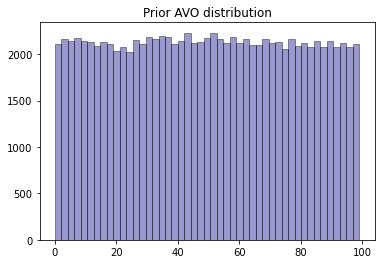

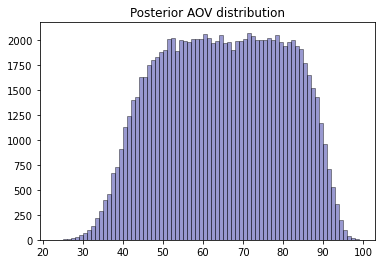

Day #2


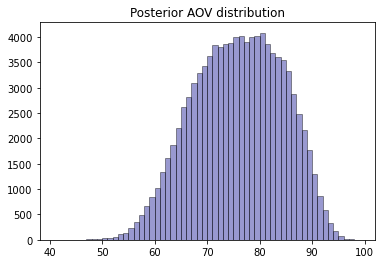

Day #3


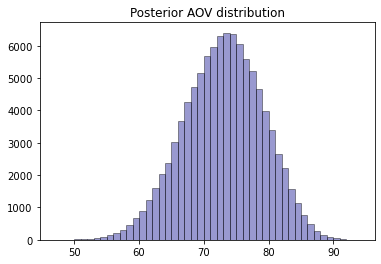

Day #4


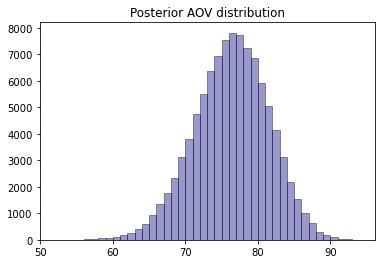

Day #5


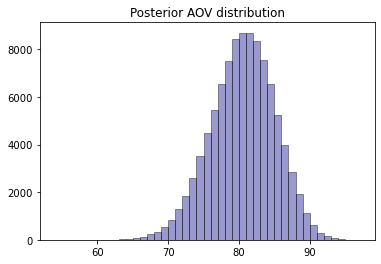

Day #6


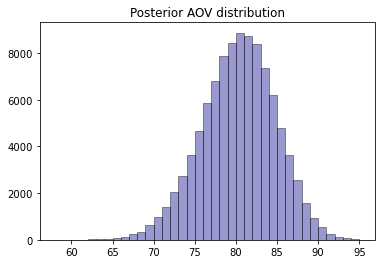

Day #7


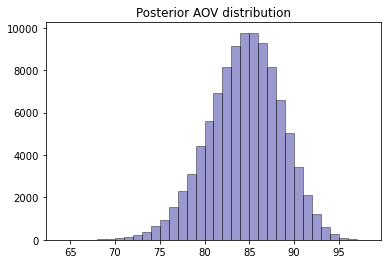

Day #8


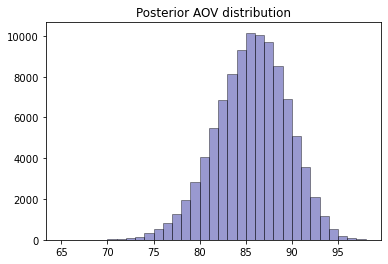

Day #9


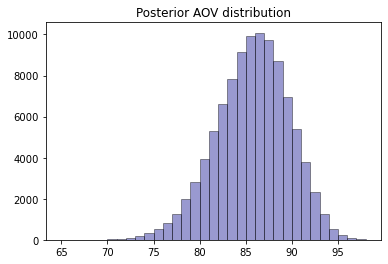

Day #10


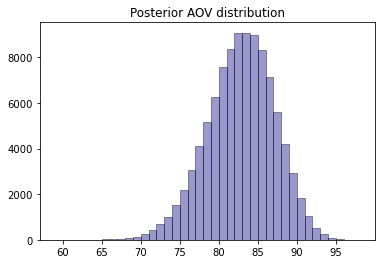

Day #11


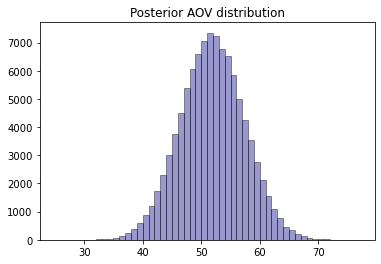

Day #12


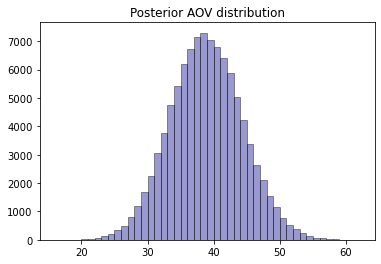

Day #13


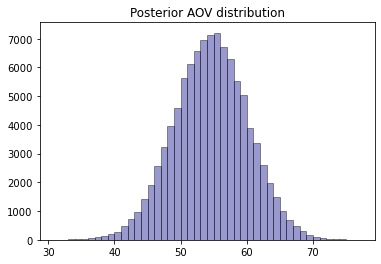

Day #14


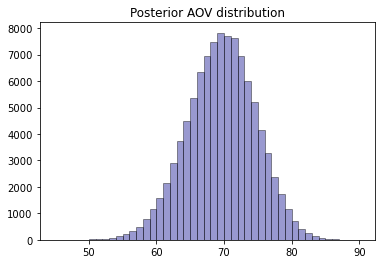

Day #15


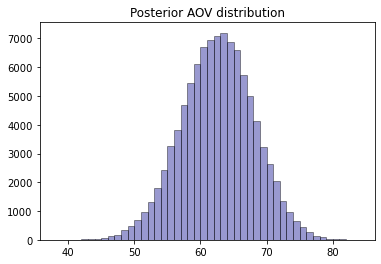

Day #16


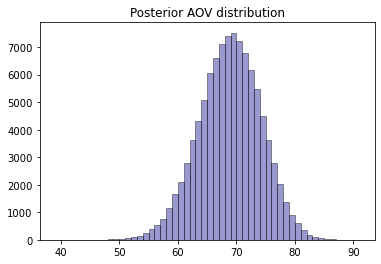

Day #17


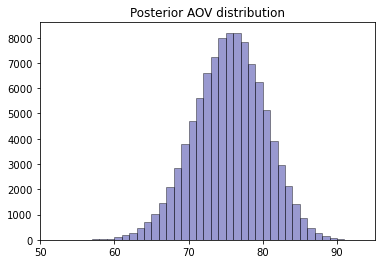

Day #18


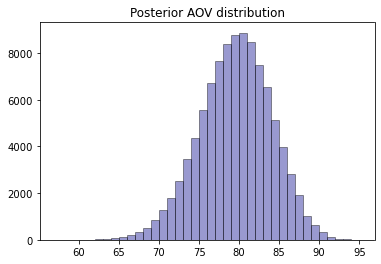

Day #19


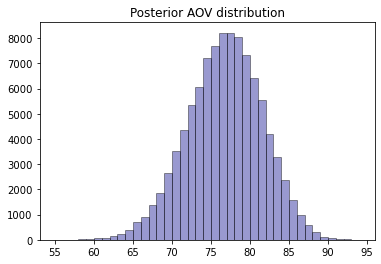

Day #20


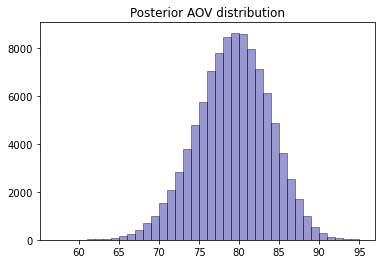

Day #21


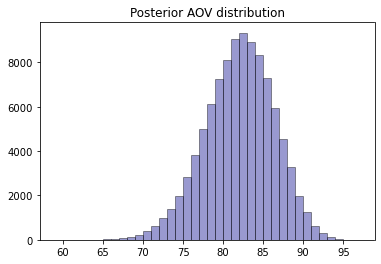

Day #22


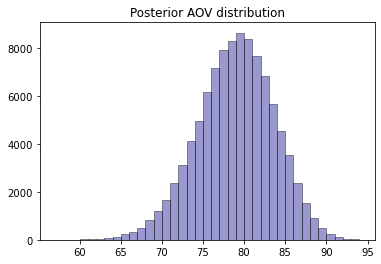

Day #23


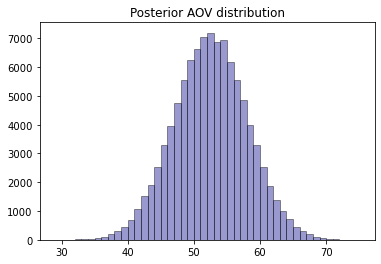

Day #24


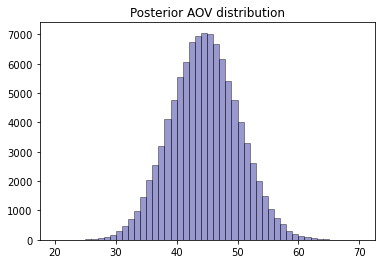

Day #25


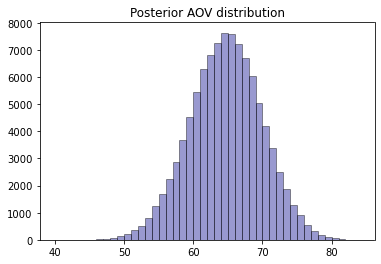

In [9]:
bayes_y = []

prior_rate = prior_rate_start
for day in enumerate(data):
    print('Day #' + str(day[0]+1))
    if day[0] == 0:
        predicted_aov = np.random.uniform(0, 99, size=trials)
        
        predicted_aov_hist = sns.distplot(predicted_aov,
                                        kde = False,
                                        color = 'darkblue',
                                        hist_kws={'edgecolor':'black'},)
        plt.title('Prior AVO distribution')
        plt.show()
        
    observed_data = day[1]
    post_rate = prior_rate[list(map(lambda x: x == observed_data, predicted_aov))]
    if post_rate.size <= trials/2:
        predicted_aov = binom.rvs(99, prior_rate_start, size=trials)
        post_rate = prior_rate_start[list(map(lambda x: x == observed_data, predicted_aov))]
        post_rate_addon = np.array([])
        for i in range(0, trials):
            value = np.random.choice(post_rate)
            post_rate_addon = np.append(post_rate_addon, value)
            
        post_rate_addon = (prior_rate + post_rate_addon)/2
          
        predicted_aov_updated = binom.rvs(99, post_rate_addon, size=trials)
        
        #entropy block start    
        predicted_aov_list = []
        for value in predicted_aov_updated:
            value = round(value, 0)
            predicted_aov_list.append(value)
        
        predicted_aov_list, information = probability_extrapolation(predicted_aov_list, trials)
        bayes_y.append(round(entropy(information), 4))
        #entropy block start end
        
        predicted_aov_hist = sns.distplot(predicted_aov_updated,
                                        kde = False,  
                                        color = 'darkblue',
                                        hist_kws={'edgecolor':'black'},
                                        bins=np.arange(predicted_aov_updated.min(), predicted_aov_updated.max() + 1))

        plt.title('Posterior AOV distribution')
        plt.show()

        prior_rate = post_rate_addon
        predicted_aov = predicted_aov_updated
        continue
    
    post_rate_addon = np.array([])
    for i in range(0, trials):
        value = np.random.choice(post_rate)
        post_rate_addon = np.append(post_rate_addon, value)
        

    predicted_aov_updated = binom.rvs(99, post_rate_addon, size=trials)
    
    #entropy block start 
    predicted_aov_list = []
    for value in predicted_aov_updated:
        value = round(value, 0)
        predicted_aov_list.append(value)
        
    predicted_aov_list, information = probability_extrapolation(predicted_aov_list, trials)
    bayes_y.append(round(entropy(information), 4))
    #entropy block end
    
    predicted_aov_hist = sns.distplot(predicted_aov_updated,
                                      kde = False,
                                    color = 'darkblue',
                                    hist_kws={'edgecolor':'black'},
                                    bins=np.arange(redicted_aov_updated.min(), redicted_aov_updated.max() + 1))

    plt.title('Posterior AOV distribution')
    plt.show()

    prior_rate = post_rate_addon
    predicted_aov = predicted_aov_updated

Text(0, 0.5, 'Uncertainty')

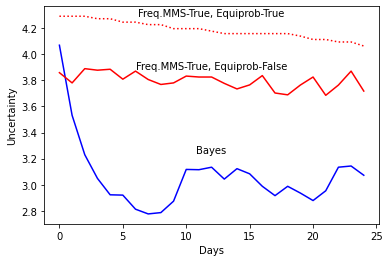

In [21]:
plt.plot(days, bayes_y, 'b')
plt.plot(days, frequensist_y_equifalse_msstrue, 'r')
plt.plot(days, frequensist_y_equitrue_msstrue, 'r:')
plt.text(12, 3.3, 'Bayes',
         rotation=0,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')
plt.text(12, 3.95, 'Freq.MMS-True, Equiprob-False',
         rotation=0,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')
plt.text(12, 4.35, 'Freq.MMS-True, Equiprob-True',
         rotation=0,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')
plt.xlabel('Days')
plt.ylabel('Uncertainty')